In [14]:
import torch as tr

if tr.backends.mps.is_available():
    device = tr.device("mps")
    x = tr.ones(1, device=device)
    print (x)
elif tr.cuda.is_available():
    device = tr.device("cuda")
    x = tr.ones(1, device=device)
    print (x)
else:
    print ("MPS or cuda device not found.")

from GP import *
import torch as tr
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from puwr import *
import torchinterp1d

import scipy.integrate as integrate
from torch.special import gammaln
#from orthogonal_poly import legendre_01

from torch.autograd.functional import hessian

import scipy.integrate as integrate

import h5py as h5

# import all packages and set plots to be embedded inline
import numpy as np 
import datetime
from scipy.optimize import minimize 
from scipy import special 
from scipy.optimize import Bounds 
from scipy.linalg import cho_solve 
#from pyDOE import lhs 
import time
#load all the Models and Kernels
from functions import *
import pylab as py


import matplotlib as mpl

import os
os.environ["PATH"] = "/sciclone/home/yacahuanamedra/texlive/bin/x86_64-linux:" + os.environ["PATH"]

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{amsfonts} \usepackage{braket}')
import pickle


from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

mpl.rc('font', **font)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

mpl.rc('font', **font)

MPS or cuda device not found.


In [21]:
import numpy as np

z = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])

m005 = np.array([
    0.03765099114673576 - 0.1313459083672451j,
    0.03710302482132123 - 0.15035024618046366j,
    0.030555363604935964 - 0.14418670221480892j,
    0.020567912422309993 - 0.11184024492647407j,
    0.007203985199363577 - 0.055980818439415644j,
    -4.095423999928016e-11 + 1.479640347303357e-12j,
    -0.014125625537839442 + 0.055906648710405106j,
    -0.021730790264268548 + 0.1117601684828938j,
    -0.030541364058318813 + 0.14412528587511297j,
    -0.03690700753630449 + 0.15033103002156123j,
    -0.03754123786236527 + 0.1313914110788476j
])
m025 = np.array([
    -0.0006529736942191841 + 0.0014788782230839449j,
    -0.00045070541974301034 + 0.0025647712831604j,
    -0.00039726623610871273 + 0.0039102214464882615j,
    -0.00039956997331957317 + 0.005262549217070547j,
    -0.00030920131617621915 + 0.005704813035940698j,
    -1.7071899449661032e-12 + 3.303189990428466e-13j,
    -0.00027634163344646134 - 0.006164134653723452j,
    -0.00024839196083146706 - 0.005812044787609154j,
    -8.392938838735695e-05 - 0.004242308783041875j,
    0.00018106712000518508 - 0.0027856781695668117j,
    0.0005046996076131858 - 0.0016006231851366627j
])
m014 = np.array([
    0.02145455468618622 - 0.11022824586072055j,
    0.025917420762449756 - 0.13978776699195986j,
    0.02279525289067724 - 0.14456229053124636j,
    0.01563874872143378 - 0.11908897863080772j,
    0.006087476038770703 - 0.06434303556240677j,
    -1.2548186933969419e-09 + 8.384043763498542e-13j,
    -0.010155433390890894 + 0.06413837722848152j,
    -0.016540210552966714 + 0.11880015314937044j,
    -0.022865762191370483 + 0.14448718749814923j,
    -0.02590966017039808 + 0.13967801717903292j,
    -0.021514718404143283 + 0.11012382480249841j
])
m016 = np.array([
    0.0020955513411522204 - 0.009744868233783848j,
    0.002753304924875739 - 0.012240061324191635j,
    0.0025133402285452376 - 0.01228398916403746j,
    0.0018273313014850884 - 0.009358232171557603j,
    0.0010819354088108385 - 0.004056936117824164j,
    2.4872139903209245e-09 - 6.900943873797994e-13j,
    -0.00112552686407498 + 0.003550051059556636j,
    -0.0022578606065800644 + 0.008729262937063616j,
    -0.00284643316796151 + 0.01190275436998322j,
    -0.002971082668046212 + 0.012000637834120354j,
    -0.0022123435268748045 + 0.009586515693153571j
])
MH=0.4170251259201194
m005=(m005+m005[::-1].conjugate())/2.0
m025=(m025+m025[::-1].conjugate())/2.0
m014=(m014+m014[::-1].conjugate())/2.0
m016=(m016+m016[::-1].conjugate())/2.0

m005_Re, m005_Im = m005.real, m005.imag
m025_Re, m025_Im = m025.real, m025.imag
m014_Re, m014_Im = m014.real, m014.imag
m016_Re, m016_Im = m016.real, m016.imag

error = 0.000001 
m005_Re_err= error*np.ones_like(m005_Re)
m005_Im_err= error*np.ones_like(m005_Im)
m025_Re_err= error*np.ones_like(m025_Re)
m025_Im_err= error*np.ones_like(m025_Im)
m014_Re_err= error*np.ones_like(m014_Re)
m014_Im_err= error*np.ones_like(m014_Im)
m016_Re_err= error*np.ones_like(m016_Re)
m016_Im_err= error*np.ones_like(m016_Im)

In [20]:
(m005+m005[::-1].conjugate())/2.0  # This line is just to ensure the complex conjugate is computed, but it does nothing in this context.

array([ 5.48766422e-05-0.13136866j,  9.80086425e-05-0.15034064j,
        6.99977331e-06-0.14415599j, -5.81438921e-04-0.11180021j,
       -3.46082017e-03-0.05594373j, -4.09542400e-11+0.j        ,
       -3.46082017e-03+0.05594373j, -5.81438921e-04+0.11180021j,
        6.99977331e-06+0.14415599j,  9.80086425e-05+0.15034064j,
        5.48766422e-05+0.13136866j])

In [106]:
#construct the integrators

def TNdata(gridnu,Mnu,errnu,x_grid,lamb,ITD="Re", mh=MH):
    

    CovD=errnu[:]**2
    CovD=(CovD+CovD.T)/2.0+ np.diag(np.ones_like(CovD)*1e-6)  #add a small regularization to the covariance matrix
    #truncate covariance matrix

    Nx=x_grid.shape[0]
    fe=FE2_Integrator(x_grid)
    B_n = fe.set_up_integration(Kernel=lambda x: 1.0)
    B_d = np.zeros_like(B_n) 
    B_d[x_grid.shape[0]//3] = 1.0
    #B_d[x_grid.shape[0]-1]=1.0
    B_d1=np.zeros_like(B_n)
    B_d1[-1] = 1.0

    # is the nu values at current z
    B = np.zeros((gridnu.shape[0],Nx))
    for k in np.arange(gridnu.shape[0]):
        if ITD=="Re":
            B[k,:] = fe.set_up_integration(Kernel= lambda x : np.cos(gridnu[k]*x))
            lam = lamb[0]  #normalization
            lam_d = lamb[1] #x=1
            lam_d1 = lamb[2] #x=end
        elif ITD=="Im":
            B[k,:] = fe.set_up_integration(Kernel= lambda x : np.sin(gridnu[k]*x))
            lam_d = lamb[1] #x=1
            lam_d1 = lamb[2] #x=end
    if ITD=="Re":
        V = np.concatenate((B_d[np.newaxis,:],B_d1[np.newaxis,:],B))
        Gamma = np.zeros((V.shape[0],V.shape[0]))
        Gamma[0,0] = lam_d
        Gamma[1,1] = lam_d1
        #Gamma[2,2] = lam
        #Gamma[2:,2:] = CovD + Reg#np.diag(eM)#CovD
        Gamma[2:,2:] = CovD #np.diag(eM**2)
        Y = np.concatenate(([0.0,0.0],Mnu))
    elif ITD=="Im":
        V = np.concatenate((B_d[np.newaxis,:],B_d1[np.newaxis,:],B))
        Gamma = np.zeros((V.shape[0],V.shape[0]))
        Gamma[0,0] = lam_d
        Gamma[1,1] = lam_d1
        Gamma[2:,2:] = CovD #np.diag(eM**2)
        Y = np.concatenate(([0.0,0.0],Mnu))
    return x_grid,V,Y,Gamma


In [5]:
m005_Re[z<0]=-m005_Re[z<0]

<ErrorbarContainer object of 3 artists>

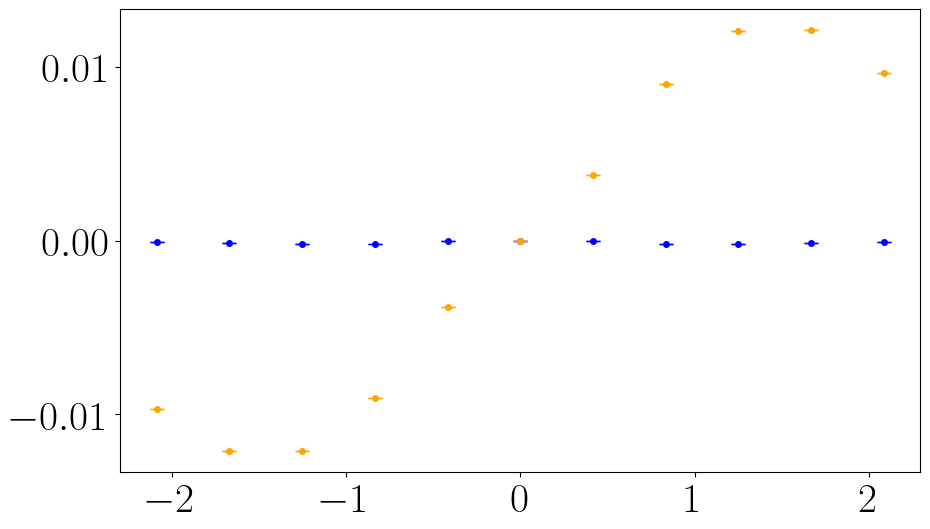

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
z_re= z#[z>-0.10]
z_im= z
data_re=m016_Re#[z>-0.10]
data_im=m016_Im
data_re_err=m016_Re_err#[z>-0.10]
data_im_err=m016_Im_err
ax.errorbar(MH*z_re, data_re, yerr=data_re_err, fmt='.', label='Real Part', color='blue', markersize=8, capsize=5)
ax.errorbar(MH*z_im, data_im, yerr=data_im_err, fmt='.', label='Imaginary Part', color='orange', markersize=8, capsize=5)
# Generate a range of z values for interpolation

In [96]:
m005_Re[z>-0.1]

array([-4.09542400e-11, -1.41256255e-02, -2.17307903e-02, -3.05413641e-02,
       -3.69070075e-02, -3.75412379e-02])

In [110]:
#mean,sigma,config,mod,ker,modfunc,kerfunc,device,mode,ID,x_grid,lab = arguments("g_flat","Krbflog","no""cpu","all",12,grid,Nx)
#x_grid=generategrid(256,"log_lin")
x_grid=np.linspace(1e-6, 3.0, 257)
def models(data_im, data_re, data_im_err, data_re_err,z_re, z_im, MH, x_grid):
    #ITD="Re"
    #x_grid=generategrid(Nx,"log_lin")
    constr=[1e-1,5e-3,1e-2]
    #x_grid=np.linspace(1e-6, 2.0, Nx+1)
    #x_gri0,V0,Y0,Gamma0 = QCdata(nu_old[1:],M[1:],M_erro[1:],x_grid,[1e-5,1e-1,1e-5],ITD)
    x_gri0,V0,Y0,Gamma0 = TNdata(MH*z_re,data_re,data_re_err,x_grid,constr,"Re")
    #x_gri0, V0, Y0, Gamma0 = QCdata(nuIm[:],dzim[:],Dzim_err[:],x_grid,[1e-5,1e-1,1e-2],ITD)
    myGP0_re= GaussianProcess(x_gri0,V0,Y0,Gamma0,"TNdata","cpu","Re","Krbflog","g_flat",['N','σ','l'],"linear",Pd=g_flat,Ker=Krbflog,mode="all",ID=12,Pd_args=(0.0,),Ker_args=(5.0,0.7))
    #myGP0_re= GaussianProcess(x_gri0,V0,Y0,Gamma0,"QCdata","cpu","Re","Krbflog","g_flat",['a','b','N','σ','l'],"linear",Pd=PDF_N,Ker=Krbflog,mode="all",ID=12,Pd_args=(0.4,1.0,2.0),Ker_args=(10.0,0.6))
    #myGP0_re.prior2ndlevel("all",0.99,mean=tr.tensor([0.0,0.0,0.0]),sigma=tr.tensor([10.0,10.0,10.0]),prior_mode=tr.tensor([2,2,2]))
    myGP0_re.prior2ndlevel("all",0.99,mean=tr.tensor([-1.0,0.0,0.0,0.0,0.0]),sigma=tr.tensor([2.0,15.0,15.0,15.0,15.0]),prior_mode=tr.tensor([2,2,2,2,2]))

    x_gri0, V0, Y0, Gamma0 = TNdata(MH*z_im,data_im,data_im_err,x_grid,constr,"Im")
    myGP0_im= GaussianProcess(x_gri0,V0,Y0,Gamma0,"TNdata","cpu","Im","Krbflog","g_flat",['a','b','N','σ','l'],"linear",Pd=g_flat,Ker=Krbflog,mode="all",ID=12,Pd_args=(0.0,),Ker_args=(5.0,0.7))
    #myGP0_im= GaussianProcess(x_gri0,V0,Y0,Gamma0,"QCdata","cpu","Im","Krbflog","PDF_N",['a','b','N','σ','l'],"linear",Pd=PDF_N,Ker=Krbflog,mode="all",ID=12,Pd_args=(.5,1.0,0.5),Ker_args=(5.0,.7))
    #myGP0_im.prior2ndlevel("all",0.99,mean=tr.tensor([0.0,0.0,0.0]),sigma=tr.tensor([10.0,10.0,10.0]),prior_mode=tr.tensor([2,2,2]))
    myGP0_im.prior2ndlevel("all",0.99,mean=tr.tensor([-1.0,0.0,0.0,0.0,0.0]),sigma=tr.tensor([2.0,15.0,15.0,15.0,15.0]),prior_mode=tr.tensor([2,2,2,2,2]))
    return myGP0_re, myGP0_im

model_re_005, model_im_005 = models(m005_Im, m005_Re, m005_Im_err, m005_Re_err, z, z_im, MH, x_grid)
model_re_025, model_im_025 = models(m025_Im, m025_Re, m025_Im_err, m025_Re_err, z, z_im, MH, x_grid)

model_re_014, model_im_014 = models(m014_Im, m014_Re, m014_Im_err, m014_Re_err, z, z_im, MH, x_grid)
model_re_016, model_im_016 = models(m016_Im, m016_Re, m016_Im_err, m016_Re_err, z, z_im, MH, x_grid)

/sciclone/home/yacahuanamedra/.conda/envs/gptorch/lib/python3.12/site-packages/torchquad/integration/utils.py:248: UserWarning: DEPRECATION WARNING: In future versions of torchquad, an array-like object will be returned.
  warnings.warn(


In [94]:
#train
def train_models(myGP0_re, myGP0_im):
    myGP0_re.train(1000,lr=1e-2,mode="all",function="evidence")
    print("Training finished")
    print(myGP0_re.pd_args,myGP0_re.ker_args)
    myGP0_im.train(1000,lr=1e-2,mode="all",function="evidence")
    print("Training finished")
    print(myGP0_im.pd_args,myGP0_im.ker_args)
print("Training models...")
print("m=5")
train_models(model_re_005, model_im_005)
print("m=25")
train_models(model_re_025, model_im_025)
print("m=14")
train_models(model_re_014, model_im_014)
print("m=016")
train_models(model_re_016, model_im_016)

Training models...
m=5
Training everything TNdata
Training finished
(tensor(-0.0315),) (tensor(6.2549),)
Training everything TNdata
Training finished
(tensor(0.1451),) (tensor(2.3131),)
m=25
Training everything TNdata
Training finished
(tensor(-0.0140),) (tensor(6.1504),)
Training everything TNdata
Training finished
(tensor(-0.0590),) (tensor(5.2215),)
m=14
Training everything TNdata
Training finished
(tensor(-0.0259),) (tensor(6.1879),)
Training everything TNdata
Training finished
(tensor(-0.5038),) (tensor(5.4231),)
m=016
Training everything TNdata
Training finished
(tensor(-0.0088),) (tensor(6.1519),)
Training everything TNdata
Training finished
(tensor(-0.0775),) (tensor(5.3786),)


In [16]:
myGP0_im.train(3000,lr=1e-2,mode="all",function="nlp")
print("Training finished")
print(myGP0_im.pd_args,myGP0_im.ker_args)

Training everything QCdata


/sciclone/scr-lst/yacahuanamedra/GP/GP.py:492: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724789563135/work/aten/src/ATen/native/TensorShape.cpp:3697.)
  nlp= 0.5*(X@X.T+ 2*tr.logdet(L))


Training finished
(tensor(0.8978), tensor(0.2678), tensor(0.6377)) (tensor(1.5754), tensor(1.7253))


In [101]:
nu_theo=np.linspace(-5,5.0,128)
Nx=x_grid.shape[0]
iBre= np.zeros((nu_theo.shape[0],Nx))
iBim= np.zeros((nu_theo.shape[0],Nx))
#B_theo= np.zeros((nu_theo.shape[0],Nx+1))
fe=FE2_Integrator(x_grid)
for k in np.arange(nu_theo.shape[0]):
    iBre[k,:] = fe.set_up_integration(Kernel= lambda x : np.cos(nu_theo[k]*x))
    iBim[k,:] = fe.set_up_integration(Kernel= lambda x : np.sin(nu_theo[k]*x))

In [43]:
max(z)

5

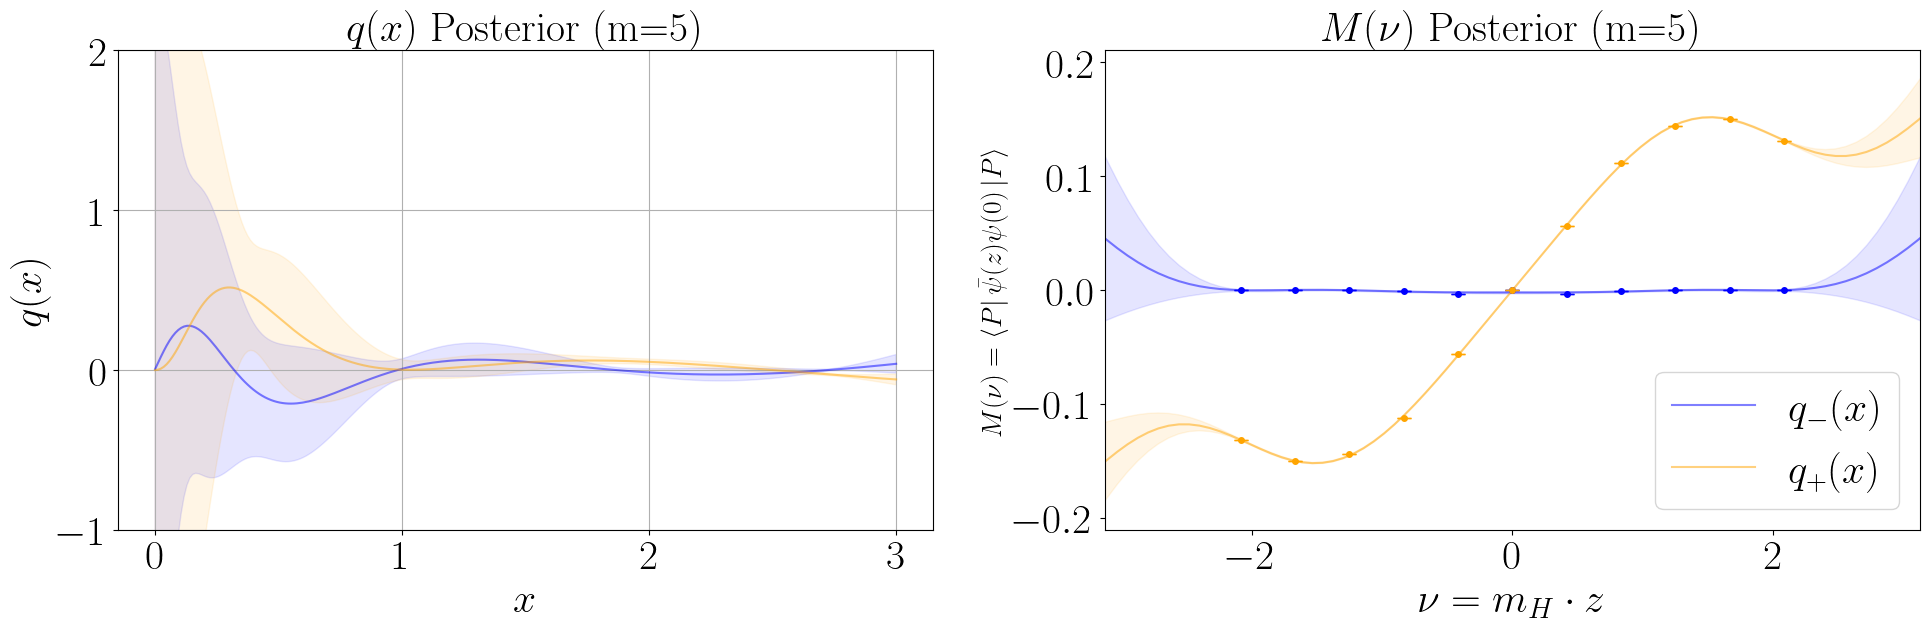

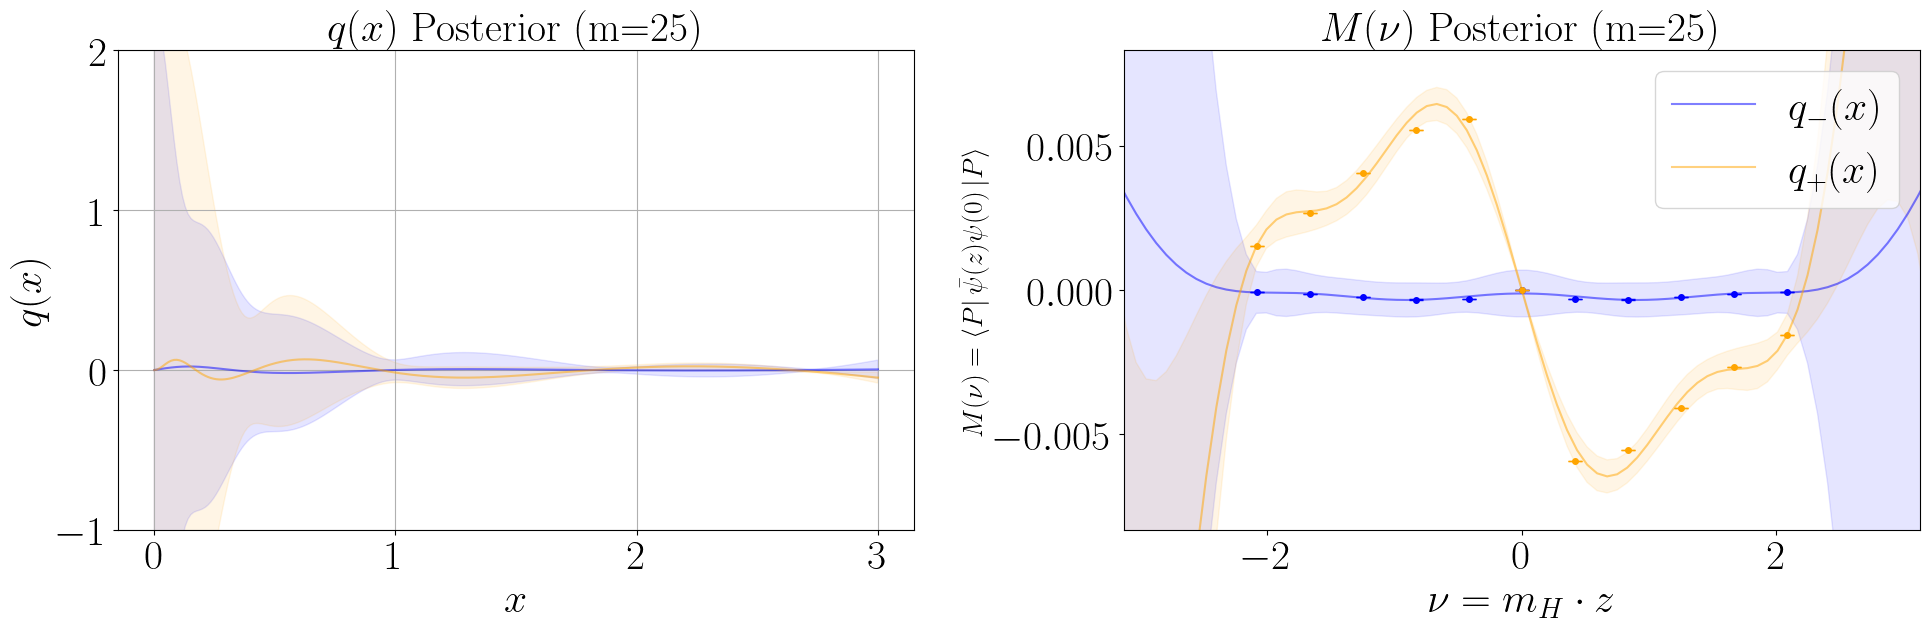

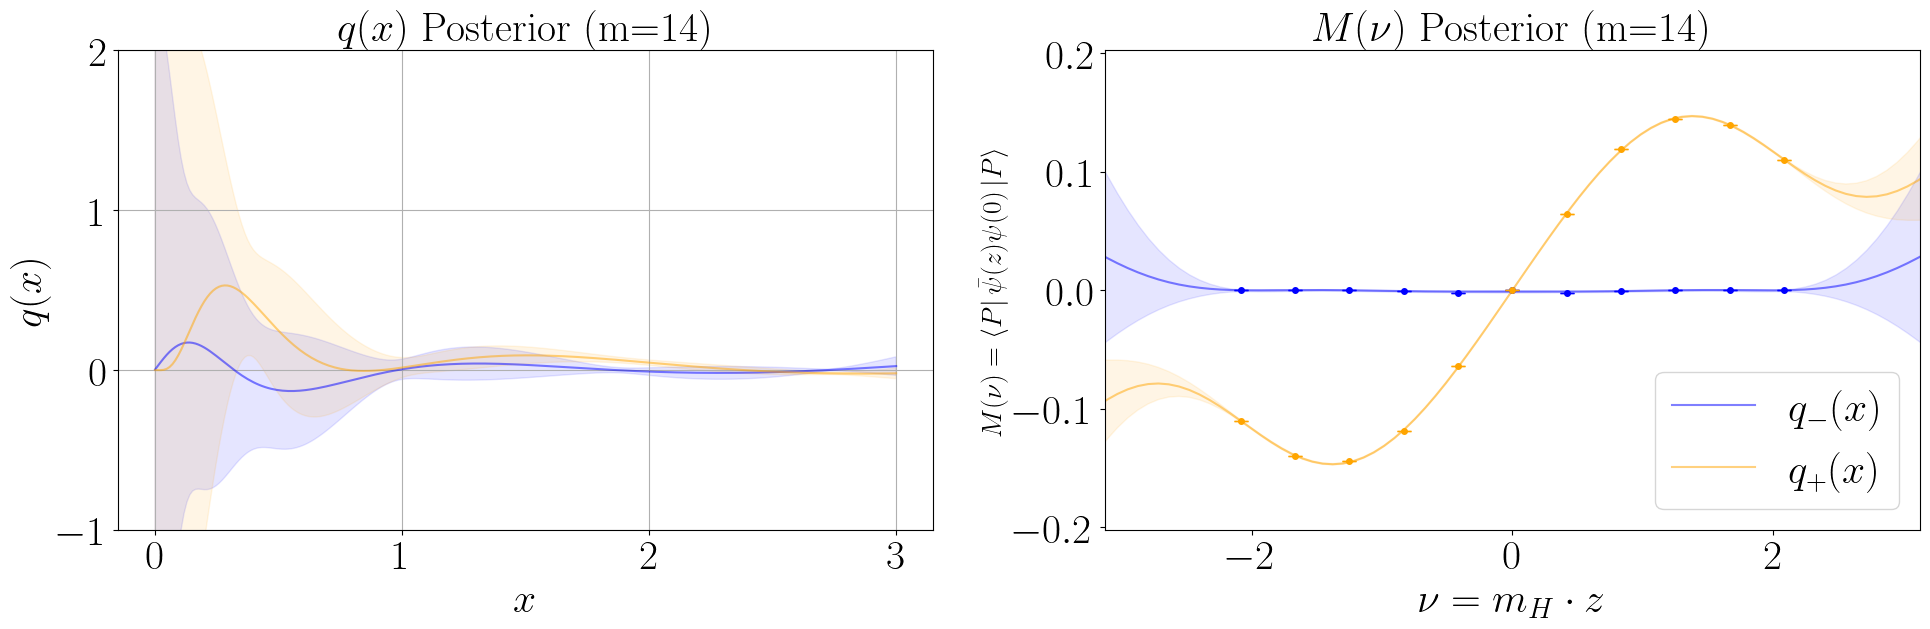

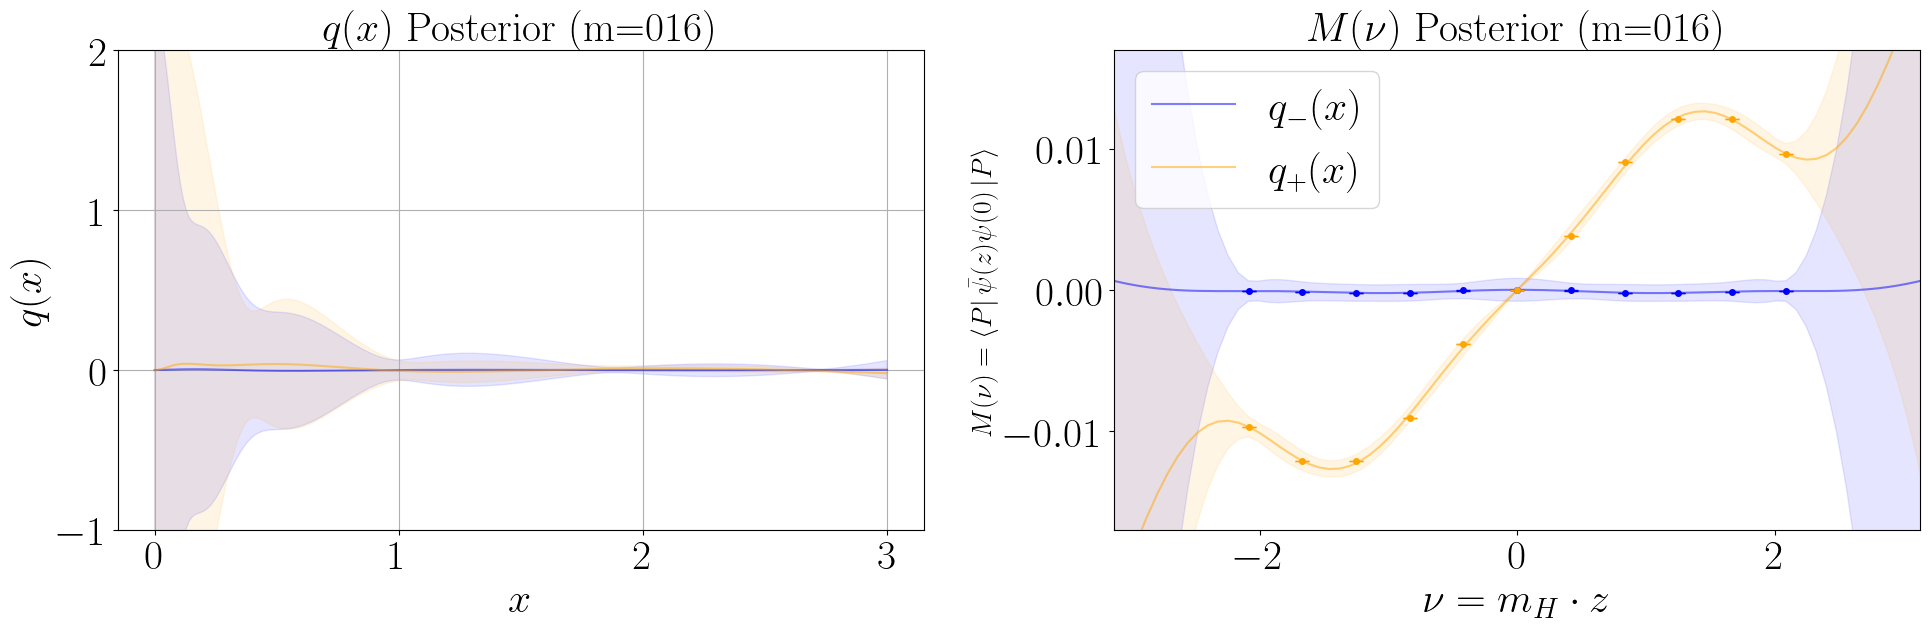

In [111]:
def plot_results(myGP0_re, myGP0_im, x_grid, nu_theo, iBre,iBim, MH, data_re,data_re_err, data_im, data_im_err,name):
    fCI=1
    fig, ax= plt.subplots(1,2, figsize=(20, 7))
    ax[0].set_title(rf'$q(x)$ Posterior ({{{name}}})', fontsize=30)
    ax[1].set_title(rf'$M(\nu)$ Posterior ({{{name}}})', fontsize=30)
    p_re,Cp_re=myGP0_re.ComputePosterior()
    p_im,Cp_im=myGP0_im.ComputePosterior()

    Cp_re=(Cp_re+Cp_re.T)/2.0+ np.diag(np.ones_like(Cp_re.diag())*1e-6)  #add a small regularization to the covariance matrix
    Cp_im=(Cp_im+Cp_im.T)/2.0+ np.diag(np.ones_like(Cp_im.diag())*1e-6)  #add a small regular

    perr= Cp_re.diag().sqrt()
    perr_im= Cp_im.diag().sqrt()
    ax[0].plot(x_grid, p_re, color='blue', alpha=0.5)#, label='mean')
    ax[0].fill_between(x_grid, p_re - fCI * perr, p_re + fCI * perr, color='blue', alpha=0.1)
    ax[0].plot(x_grid, p_im, color='orange', alpha=0.5)#, label='mean Im')
    ax[0].fill_between(x_grid, p_im - fCI * perr_im, p_im + fCI * perr_im, color='orange', alpha=0.1)
    ax[0].set_xlabel(r'$x$')
    ax[0].set_ylabel(r'$q(x)$')
    ax[0].set_ylim(-1.0, 2.0)
    #show grid
    ax[0].grid()
    #nuspace
    nu_theo=tr.tensor(nu_theo)
    iB=tr.tensor(iBre)
    MM=(iB @ p_re).reshape(-1)
    covnu=iB @ Cp_re @ iB.T
    Qerror=covnu.diag().abs().sqrt()

    iB_im = tr.tensor(iBim)
    MM_im = (iB_im @ p_im).reshape(-1)
    covnu_im = iB_im @ Cp_im @ iB_im.T
    Qerror_im = covnu_im.diag().abs().sqrt()

    #negative values
    #covnu[covnu<0]=0
    ax[1].set_xlabel(r'$\nu=m_H \cdot z$')
    ax[1].set_ylabel(r'$M(\nu)=\bra{P}\bar{\psi}(z)\psi(0)\ket{P}$', fontsize=20)
    ax[1].plot(nu_theo, MM, color='blue', alpha=0.5, label=r'$q_-(x)$')
    ax[1].fill_between(nu_theo, MM - fCI * Qerror, MM + fCI * Qerror, color='blue', alpha=0.1)

    ax[1].plot(nu_theo, MM_im, color='orange', alpha=0.5,label=r'$q_+(x)$')
    ax[1].fill_between(nu_theo, MM_im - fCI * Qerror_im, MM_im + fCI * Qerror_im, color='orange', alpha=0.1)
    #ax[1].errorbar(nu_old, M, yerr=M_erro, fmt='.', label='Data', color='blue', markersize=8, capsize=5)
    ax[1].errorbar(MH*z, data_re, yerr=data_re_err, fmt='.', color='blue', markersize=8, capsize=5)
    ax[1].errorbar(MH*z, data_im, yerr=data_im_err, fmt='.', color='orange', markersize=8, capsize=5)
    ax[1].set_ylim(min(data_im)*1.4, max(data_im)*1.4)
    ax[1].set_xlim(min(z)*MH*1.5, max(z)*MH*1.5)
    ax[1].legend()
    #ax[1].errorbar(nuIm, dzim, yerr=Dzim_err, fmt='.', label='Data', color='blue', markersize=8, capsize=5)
plot_results(model_re_005, model_im_005, x_grid, nu_theo, iBre, iBim,MH, data_re=m005_Re, data_re_err=m005_Re_err, data_im=m005_Im, data_im_err=m005_Im_err,name="m=5")
plot_results(model_re_025, model_im_025, x_grid, nu_theo, iBre, iBim,MH, data_re=m025_Re, data_re_err=m025_Re_err, data_im=m025_Im, data_im_err=m025_Im_err,name="m=25")
plot_results(model_re_014, model_im_014, x_grid, nu_theo, iBre, iBim,MH, data_re=m014_Re, data_re_err=m014_Re_err, data_im=m014_Im, data_im_err=m014_Im_err,name="m=14")
plot_results(model_re_016, model_im_016, x_grid, nu_theo, iBre, iBim,MH, data_re=m016_Re, data_re_err=m016_Re_err, data_im=m016_Im, data_im_err=m016_Im_err,name="m=016")


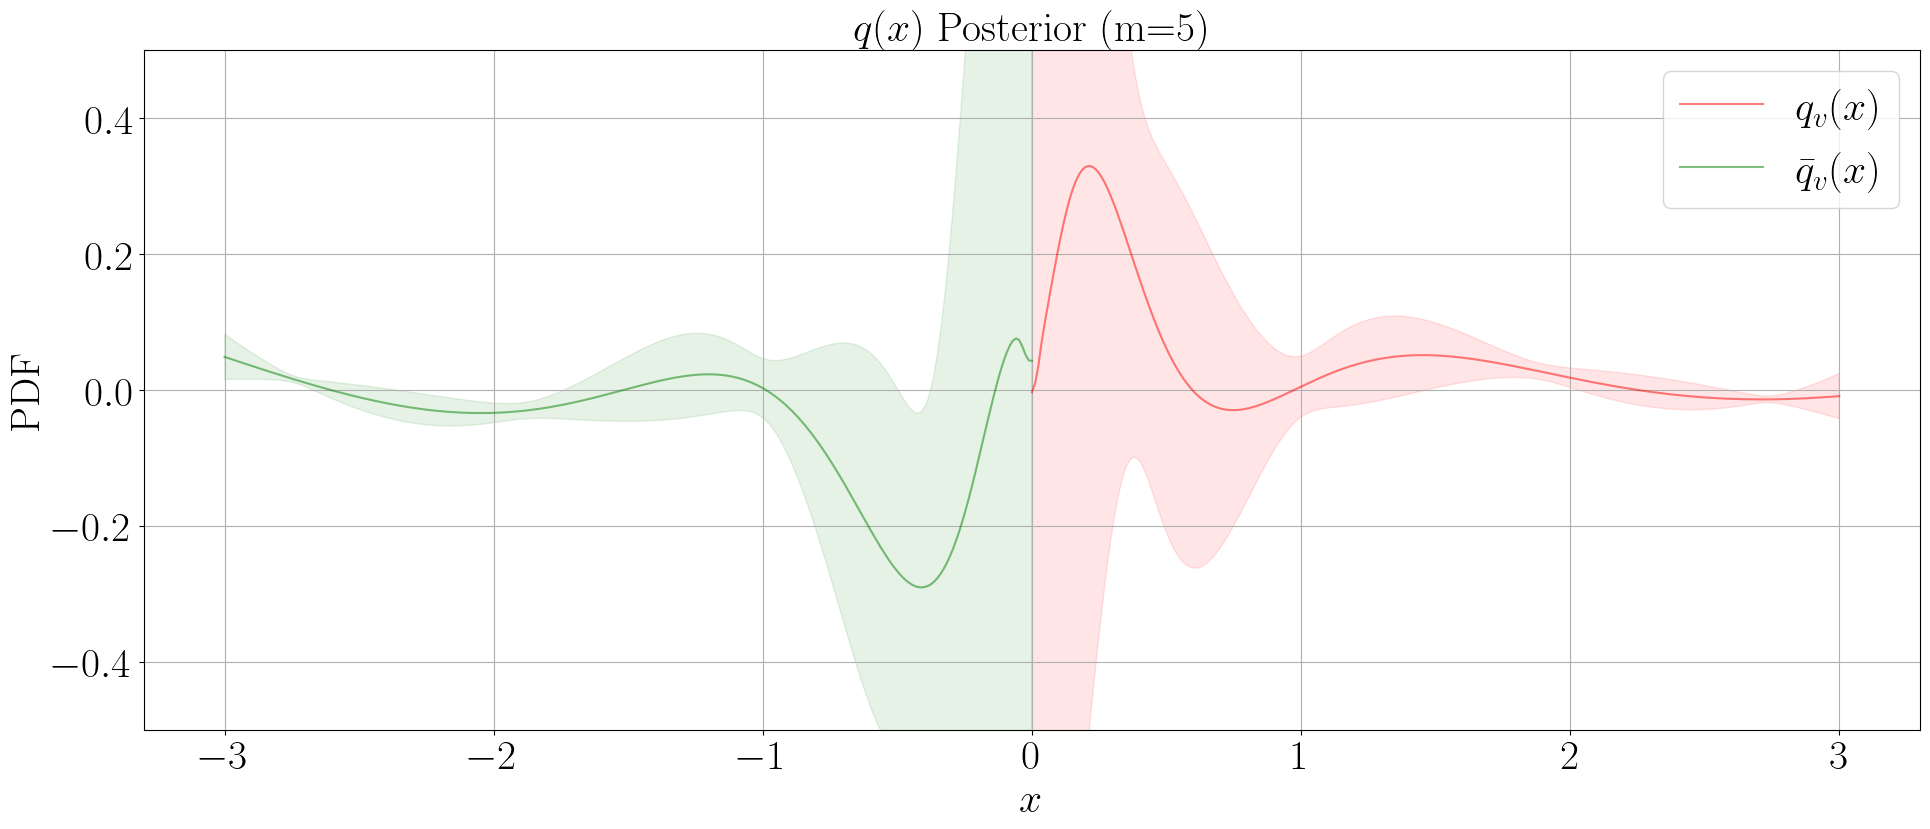

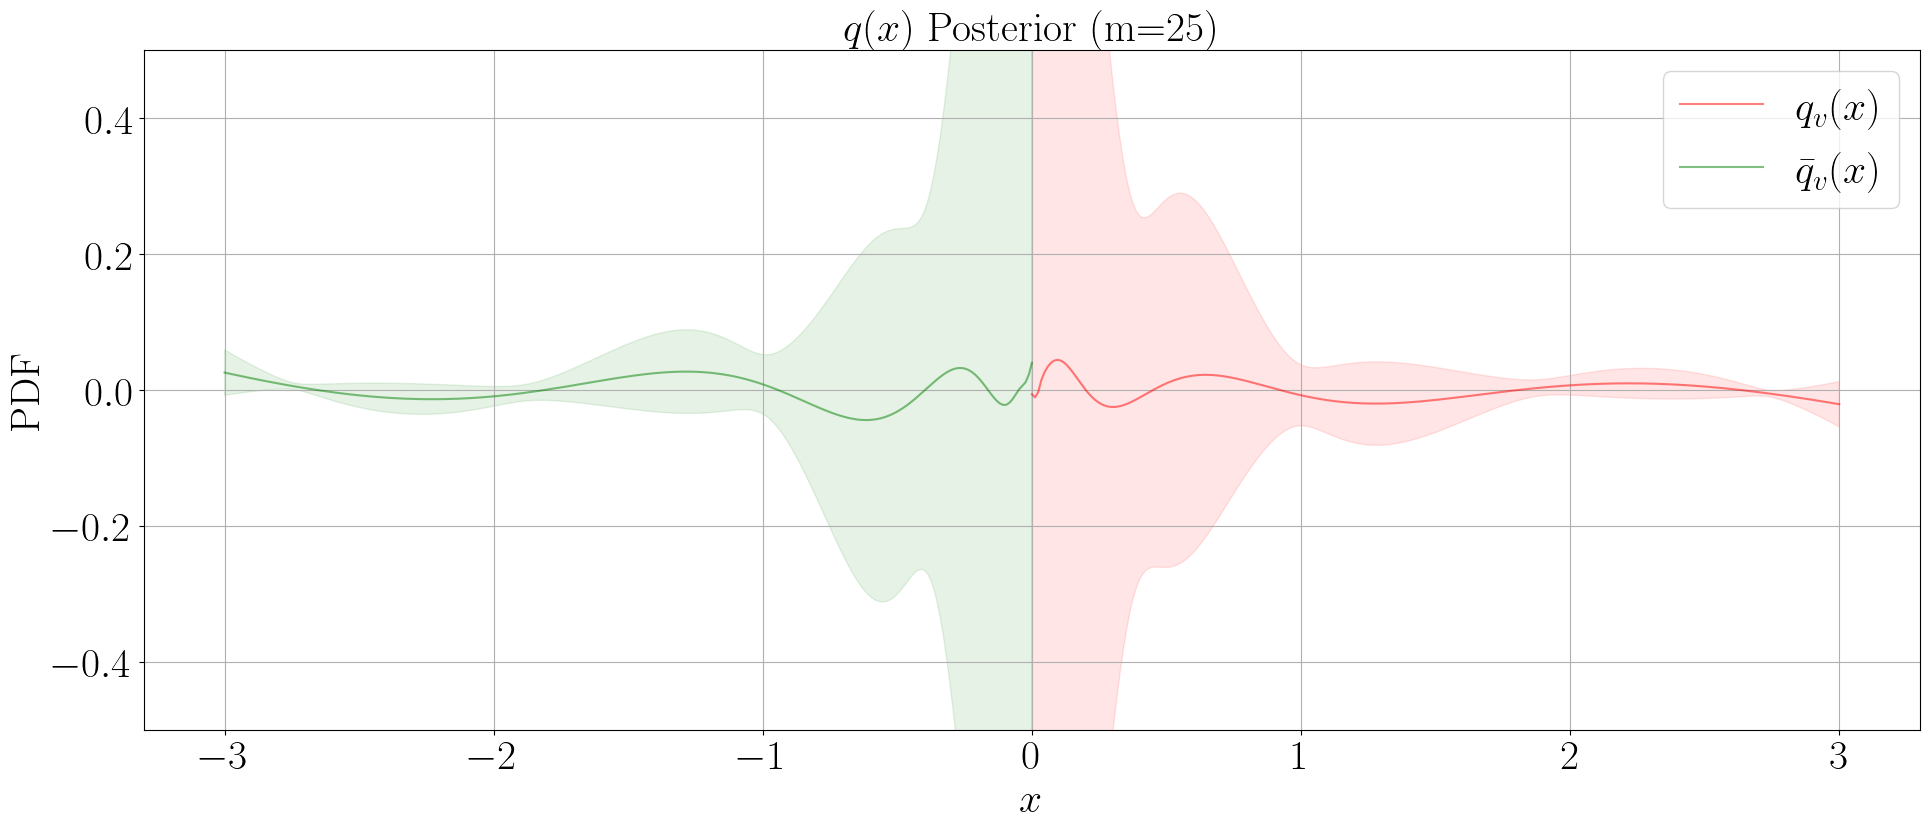

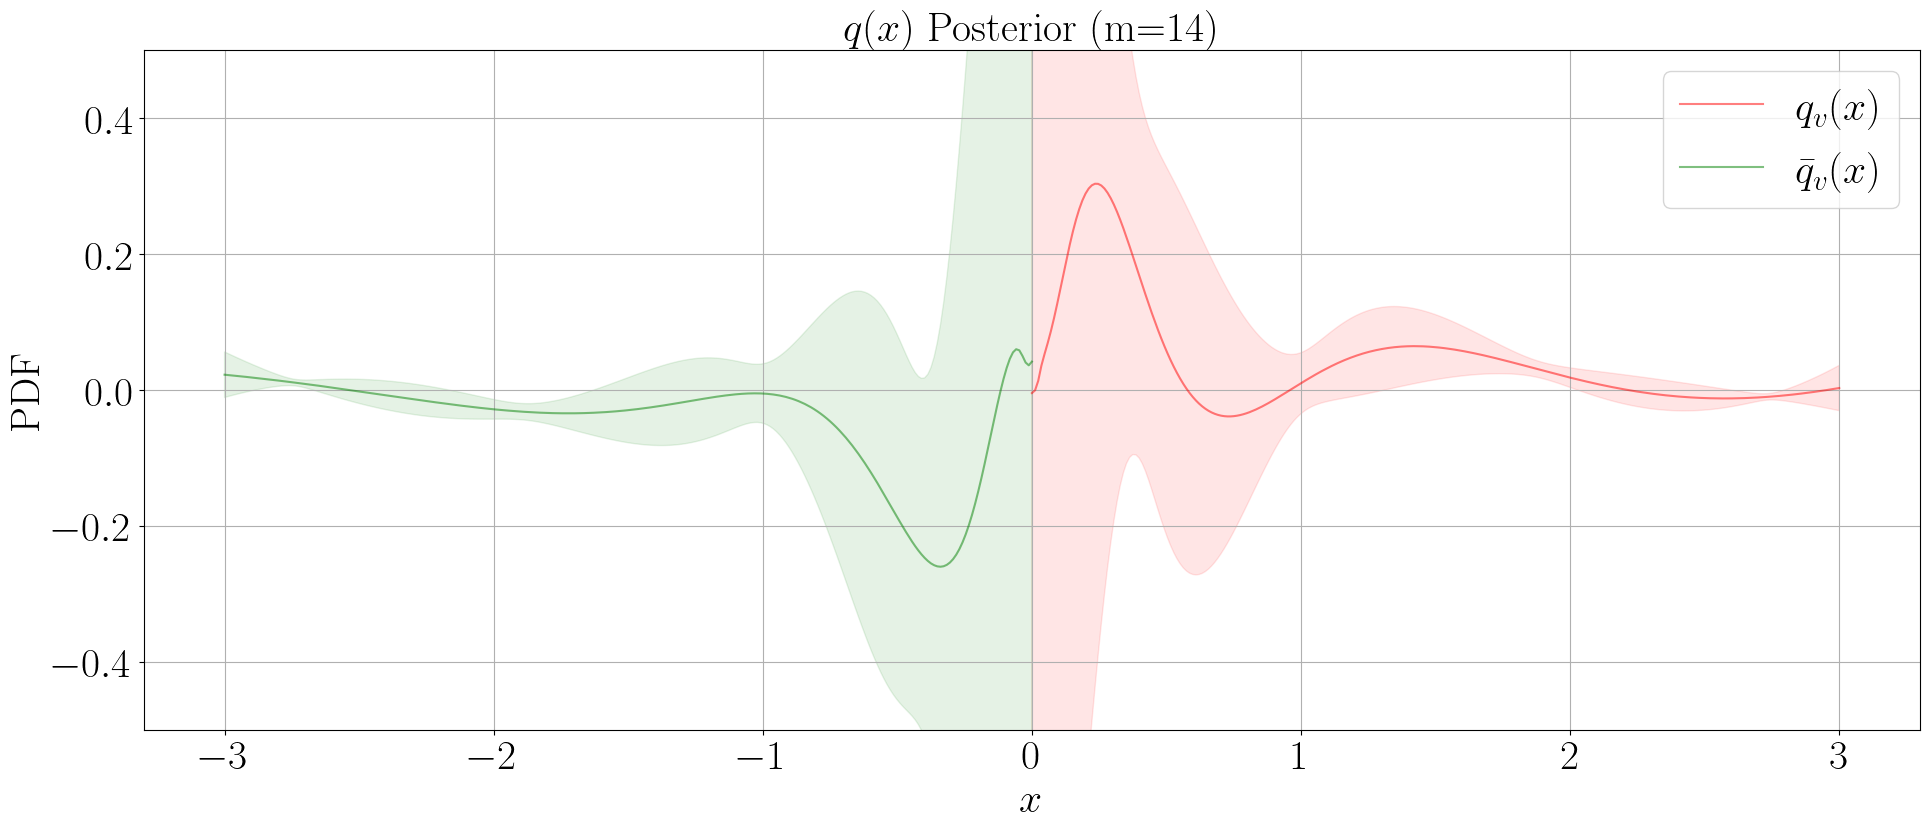

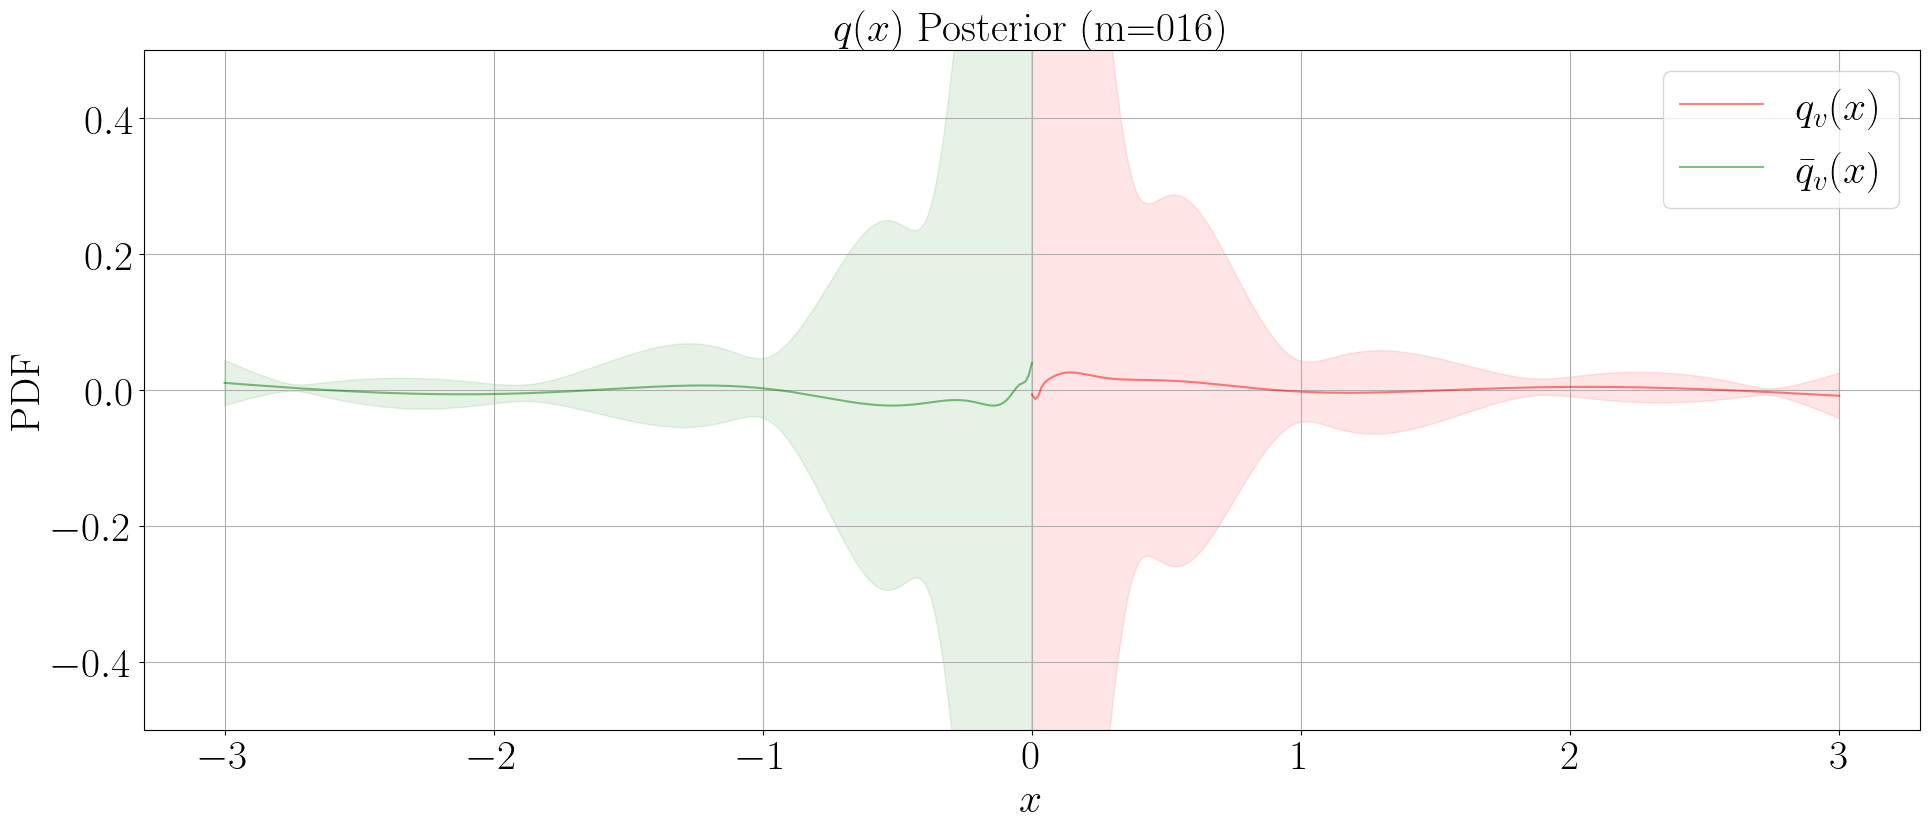

In [ ]:
def PDFssample(myGP0_re, myGP0_im, x_grid, nu_theo, iBre, iBim,name):

    #replicas of imaginary and real part gaussian process with mean and covariance
    fCI = 1.0
    np.random.seed(0)
    Nsamples = 10000
    nu_theo=tr.tensor(nu_theo)

    p_re,Cp_re=myGP0_re.ComputePosterior()
    p_im,Cp_im=myGP0_im.ComputePosterior()

    Cp_re=(Cp_re+Cp_re.T)/2.0+ np.diag(np.ones_like(Cp_re.diag())*1e-6)  #add a small regularization to the covariance matrix
    Cp_im=(Cp_im+Cp_im.T)/2.0+ np.diag(np.ones_like(Cp_im.diag())*1e-6)  #add a small regular

    iB=tr.tensor(iBre)
    MM=(iB @ p_re).reshape(-1)
    covnu=iB @ Cp_re @ iB.T
    Qerror=covnu.diag().abs().sqrt()

    iB_im = tr.tensor(iBim)
    MM_im = (iB_im @ p_im).reshape(-1)
    covnu_im = iB_im @ Cp_im @ iB_im.T
    Qerror_im = covnu_im.diag().abs().sqrt()
    pdf_m= np.random.multivariate_normal(p_re, Cp_re, size=Nsamples)
    pdf_p= np.random.multivariate_normal(p_im, Cp_im, size=Nsamples)

    q=np.zeros((Nsamples, Nx))
    qb=np.zeros((Nsamples, Nx))
    for i in range(Nsamples):
        q[i]=(pdf_m[i]+ pdf_p[i])/2.0
        qb[i]=(-pdf_p[i]+ pdf_m[i])/2.0
    q_m= np.mean(q, axis=0)
    qb_m= np.mean(qb, axis=0)
    qcov= np.cov(q.T)
    qb_cov= np.cov(qb.T)

    fig, ax = plt.subplots(1, 1, figsize=(20, 9))
    ax.set_title(rf'$q(x)$ Posterior ({{{name}}})', fontsize=30)
    
    ax.plot(x_grid, q_m, color='red', alpha=0.5, label=r'$q_v(x)$')
    perr = np.sqrt(np.diag(qcov))
    ax.fill_between(x_grid, q_m - fCI * perr, q_m + fCI * perr, color='red', alpha=0.1)
    ax.plot(-x_grid, qb_m, color='green', alpha=0.5, label= r'$\bar{q}_v(x)$')
    perr_b = np.sqrt(np.diag(qb_cov))
    ax.fill_between(-x_grid, qb_m - fCI * perr_b, qb_m + fCI * perr_b, color='green', alpha=0.1)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'PDF')
    ax.set_ylim(-0.5, 0.5)
    #ax.set_xlim(-1.0, 1.0)
    ax.grid(True)
    ax.legend()

PDFssample(model_re_005, model_im_005, x_grid, nu_theo, iBre, iBim, name="m=5")
PDFssample(model_re_025, model_im_025, x_grid, nu_theo, iBre, iBim, name="m=25")
PDFssample(model_re_014, model_im_014, x_grid, nu_theo, iBre, iBim, name="m=14")
PDFssample(model_re_016, model_im_016, x_grid, nu_theo, iBre, iBim, name="m=016")